# Contents

<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contents" data-toc-modified-id="Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Contents</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Analyze" data-toc-modified-id="Analyze-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analyze</a></span><ul class="toc-item"><li><span><a href="#Response" data-toc-modified-id="Response-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Response</a></span></li><li><span><a href="#Apt-type" data-toc-modified-id="Apt-type-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Apt type</a></span></li><li><span><a href="#Apt-date" data-toc-modified-id="Apt-date-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Apt date</a></span></li><li><span><a href="#Sent_time" data-toc-modified-id="Sent_time-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Sent_time</a></span></li><li><span><a href="#Send_time" data-toc-modified-id="Send_time-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Send_time</a></span></li><li><span><a href="#Net_hour" data-toc-modified-id="Net_hour-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Net_hour</a></span></li><li><span><a href="#Type-of-reminder" data-toc-modified-id="Type-of-reminder-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Type of reminder</a></span></li><li><span><a href="#Clinics" data-toc-modified-id="Clinics-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Clinics</a></span></li><li><span><a href="#Size-of-the-clinic" data-toc-modified-id="Size-of-the-clinic-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Size of the clinic</a></span></li><li><span><a href="#Province" data-toc-modified-id="Province-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Province</a></span></li><li><span><a href="#Cities" data-toc-modified-id="Cities-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>Cities</a></span></li><li><span><a href="#Area-type---urban/rural" data-toc-modified-id="Area-type---urban/rural-4.12"><span class="toc-item-num">4.12&nbsp;&nbsp;</span>Area type - urban/rural</a></span></li><li><span><a href="#Gender" data-toc-modified-id="Gender-4.13"><span class="toc-item-num">4.13&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#Age" data-toc-modified-id="Age-4.14"><span class="toc-item-num">4.14&nbsp;&nbsp;</span>Age</a></span></li><li><span><a href="#Family-size" data-toc-modified-id="Family-size-4.15"><span class="toc-item-num">4.15&nbsp;&nbsp;</span>Family size</a></span></li><li><span><a href="#Distance-to-clinic" data-toc-modified-id="Distance-to-clinic-4.16"><span class="toc-item-num">4.16&nbsp;&nbsp;</span>Distance to clinic</a></span></li></ul></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correlations</a></span></li></ul></div>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime


# Data

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
data = pd.read_csv("dataset/train.csv", index_col= 0, parse_dates=True)

In [4]:
# number of rows, columns
print("Number of rows, columns:")
data.shape

Number of rows, columns:


(919650, 20)

In [5]:
print("Duplicated rows:")
data.duplicated().sum()

Duplicated rows:


1103

In [6]:
print("Rows with NaN:")
data.isna().sum().sum()

Rows with NaN:


16

In [7]:
data.head()

,response,apt_type,apt_date,sent_time,send_time,net_hour,type,clinic,city,province,cli_zip,cli_area,cli_size,pat_id,family_id,fam,gender,age,pat_area,dist
0,1,recall,2017-09-18 13:00:00,2017-09-14 19:03:03,17:30:00,-48,Voice,20758,Moncton,NB,E1E4C9,Urban,1239,427789,291683,3,M,20,Urban,65.929
1,0,6mth-rc,2017-09-06 17:00:00,2017-08-31 18:00:54,18:00:00,-72,Voice,122500,Port Coquitlam,BC,V3B5Y9,Urban,691,172834,49762,4,M,20,Urban,4.104
2,0,endo,2017-05-02 18:00:00,2017-04-28 10:12:42,10:00:00,-48,Email,20153,Nanaimo,BC,V9T4B5,Urban,1168,132074,101158,4,M,15,Rural,9.246
3,0,productive,2018-05-30 09:10:00,2018-05-28 09:00:37,09:00:00,-48,SMS,122335,Casselman,ON,K0A1M0,Rural,3425,145832,39367,4,F,50,Rural,10.693
4,0,filling,2019-02-04 08:00:00,2019-01-31 15:14:07,11:00:00,-48,SMS,143632,Etobicoke,ON,M8W3V5,Urban,274,88996,82480,2,F,65,Urban,6.937


In [8]:
data.apt_date = pd.to_datetime(data.apt_date)
data.sent_time = pd.to_datetime(data.sent_time)

In [9]:
print("Columns datatypes:")
data.dtypes

Columns datatypes:


response              int64
apt_type             object
apt_date     datetime64[ns]
sent_time    datetime64[ns]
send_time            object
net_hour              int64
type                 object
clinic                int64
city                 object
province             object
cli_zip              object
cli_area             object
cli_size              int64
pat_id                int64
family_id             int64
fam                   int64
gender               object
age                   int64
pat_area             object
dist                float64
dtype: object

# Analyze

## Response

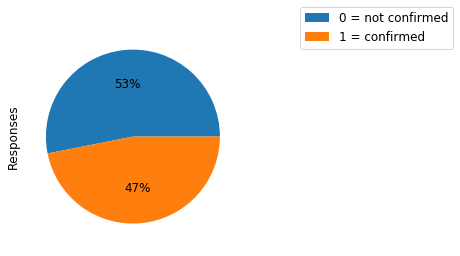

In [10]:
plt.rcParams.update({'font.size': 12})
data.response.value_counts().plot.pie(autopct='%1.0f%%', labels=None);
plt.ylabel("Responses")
plt.legend(["0 = not confirmed", "1 = confirmed"], loc="right", bbox_to_anchor=(0, 1, 2, 0));


## Apt type

In [11]:
data.apt_type.describe()

count      919634
unique       2423
top       general
freq       222073
Name: apt_type, dtype: object

## Apt date

In [12]:
data.apt_date.describe()

count                  919650
unique                  35842
top       2019-01-15 14:00:00
freq                      796
first     2017-03-21 15:30:00
last      2023-04-07 11:15:00
Name: apt_date, dtype: object

## Sent_time

In [13]:
data.sent_time.describe()

count                  919650
unique                 177928
top       2019-02-07 14:08:53
freq                      925
first     2017-02-18 08:30:51
last      2019-02-13 16:39:06
Name: sent_time, dtype: object

## Send_time

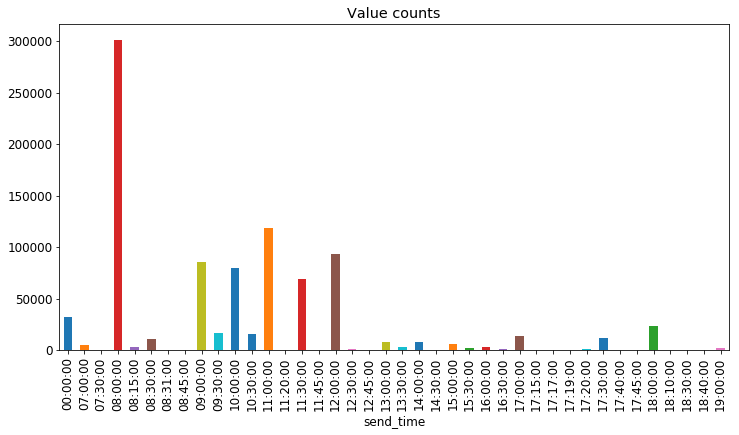

In [14]:
plt.figure(figsize=(12,6))
plt.title("Value counts")
data.groupby("send_time").response.count().plot.bar();

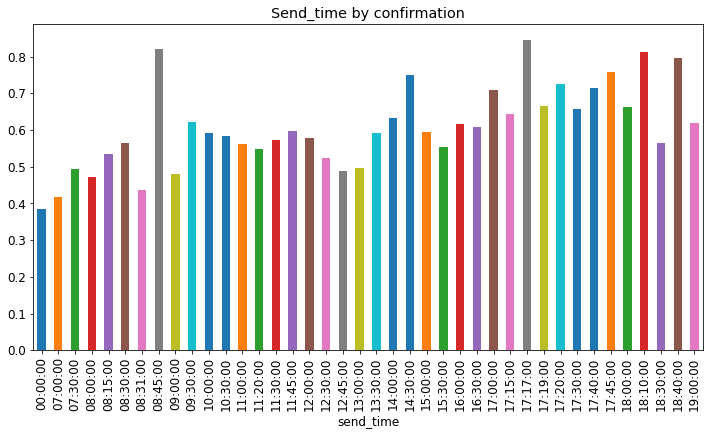

In [15]:
plt.figure(figsize=(12,6))
plt.title("Send_time by confirmation")
(data.groupby("send_time").response.mean()).plot.bar();

## Net_hour

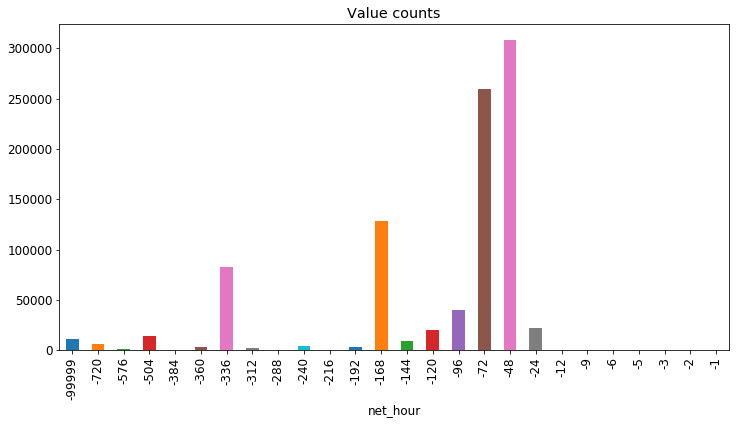

In [16]:
plt.figure(figsize=(12,6))
plt.title("Value counts")
data.groupby("net_hour").response.count().plot.bar();

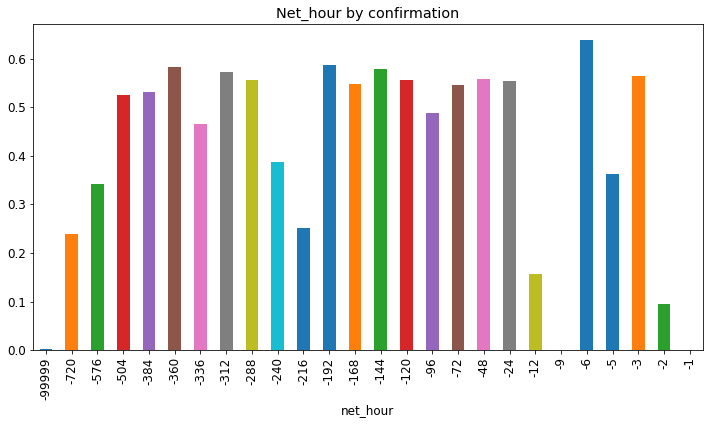

In [17]:
plt.figure(figsize=(12,6))
plt.title("Net_hour by confirmation")
(data.groupby("net_hour").response.mean()).plot.bar();

## Type of reminder

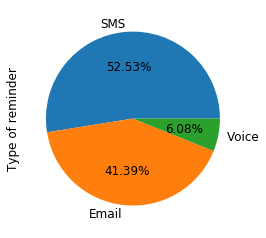

In [18]:
data.type.value_counts().plot.pie(autopct='%1.2f%%')
plt.ylabel('Type of reminder');


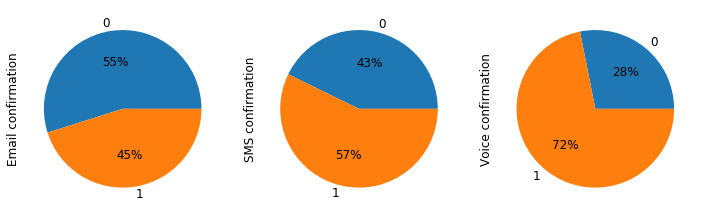

In [19]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
data[data.type == "Email"].response.value_counts().sort_index().plot.pie(autopct='%1.0f%%')
plt.ylabel('Email confirmation')

plt.subplot(1,3,2)
data[data.type == "SMS"].response.value_counts().sort_index().plot.pie(autopct='%1.0f%%')
plt.ylabel('SMS confirmation')

plt.subplot(1,3,3)
data[data.type == "Voice"].response.value_counts().sort_index().plot.pie(autopct='%1.0f%%')
plt.ylabel('Voice confirmation')

plt.show()

## Clinics

In [20]:
print("Number of clinics:")
len(data.clinic.unique())

Number of clinics:


665

In [21]:
print("Best clinics - confirmation rate percentage:")
data.groupby("clinic").response.mean().sort_values(ascending=False).head()

Best clinics - confirmation rate percentage:


clinic
122580    0.868132
20697     0.850659
121835    0.846154
121223    0.818731
20436     0.807018
Name: response, dtype: float64

In [22]:
print("Worst clinics - confirmation rate percentage:")
data.groupby("clinic").response.mean().sort_values(ascending=False).tail()

Worst clinics - confirmation rate percentage:


clinic
122767    0.050459
143820    0.046693
122980    0.036245
122684    0.034615
122316    0.000000
Name: response, dtype: float64

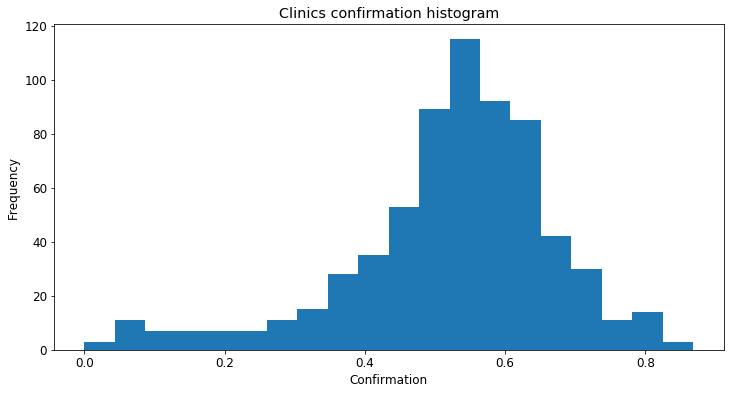

In [23]:
plt.figure(figsize=(12,6))
data.groupby("clinic").response.mean().plot.hist(20)
plt.title("Clinics confirmation histogram")
plt.xlabel("Confirmation");

## Size of the clinic

In [24]:
data.cli_size.describe().round()

count    919650.0
mean       1462.0
std        1082.0
min           7.0
25%         674.0
50%        1218.0
75%        1956.0
max        4735.0
Name: cli_size, dtype: float64

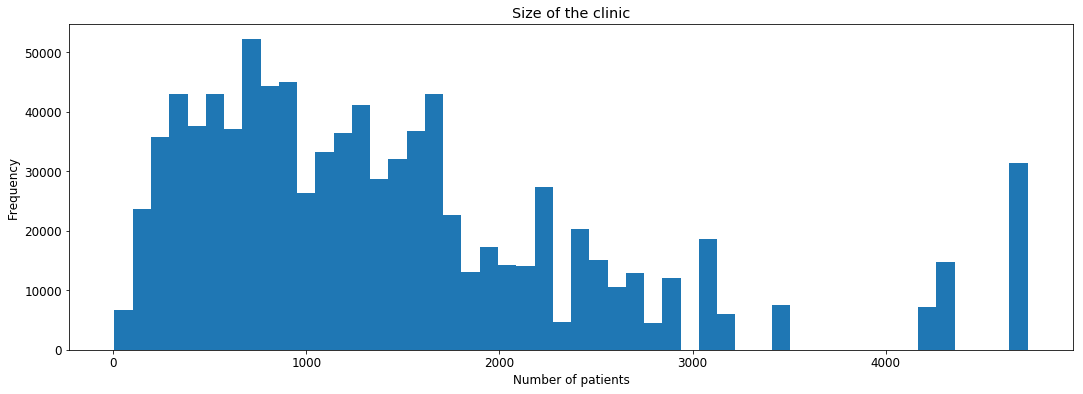

In [25]:
plt.figure(figsize=(18,6))
data.cli_size.plot.hist(50)
plt.title("Size of the clinic")
plt.xlabel("Number of patients");

## Province

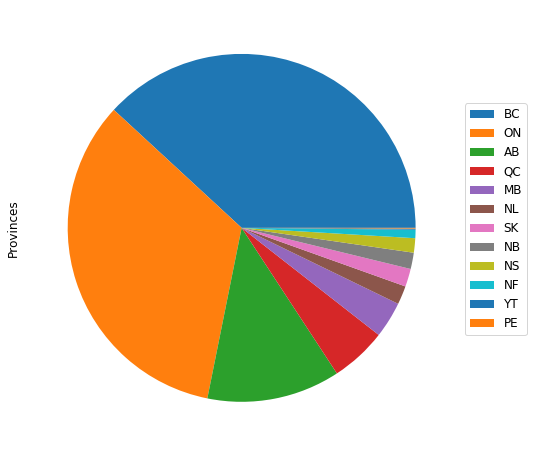

In [26]:
plt.figure(figsize=(12,8))
data.province.value_counts().plot.pie(labels=None)
plt.ylabel('Provinces')
plt.legend(data.province.value_counts().index, bbox_to_anchor=(1, 0.8));

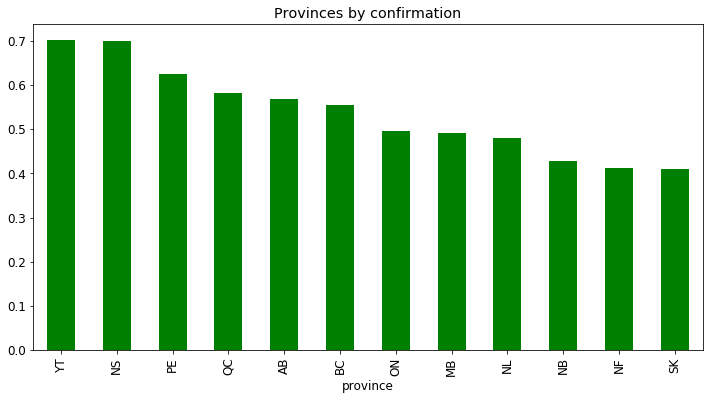

In [27]:
plt.figure(figsize=(12,6))
plt.title("Provinces by confirmation")
data.groupby('province').response.mean().sort_values(ascending=False).plot.bar(color='green');

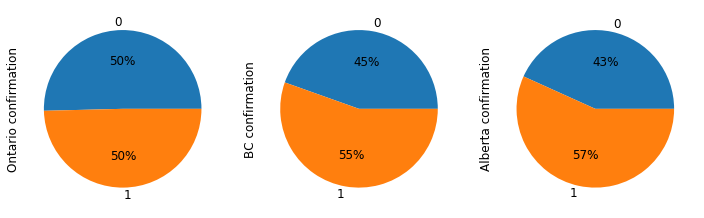

In [28]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
data[data.province == "ON"].response.value_counts().sort_index().plot.pie(autopct='%1.0f%%');
plt.ylabel('Ontario confirmation')

plt.subplot(1,3,2)
data[data.province == "BC"].response.value_counts().sort_index().plot.pie(autopct='%1.0f%%');
plt.ylabel('BC confirmation')

plt.subplot(1,3,3)
data[data.province == "AB"].response.value_counts().sort_index().plot.pie(autopct='%1.0f%%');
plt.ylabel('Alberta confirmation')

plt.show()

## Cities

In [29]:
print("Number of cities:")
len(data.city.unique())

Number of cities:


209

In [30]:
print("Cities with biggest number of data:")
data.city.value_counts().head()

Cities with biggest number of data:


Vancouver    52446
Victoria     39408
Toronto      36542
Calgary      34413
Burnaby      33393
Name: city, dtype: int64

In [31]:
print("Cities with smallest number of data:")
data.city.value_counts().tail()

Cities with smallest number of data:


Nepean                58
Ormstown              55
Saint-Constant        45
Brockville            33
Salt Spring Island    27
Name: city, dtype: int64

In [32]:
print("Best cities - confirmation rate percentage:")
data.groupby('city').response.mean().sort_values(ascending=False).head()

Best cities - confirmation rate percentage:


city
Longlac      0.794574
Geraldton    0.783278
Dartmouth    0.761657
Vernon       0.749696
St Paul      0.743421
Name: response, dtype: float64

In [33]:
print("Worst cities - confirmation rate percentage:")
data.groupby('city').response.mean().sort_values(ascending=False).tail()

Worst cities - confirmation rate percentage:


city
Saskatoon      0.143180
Arnprior       0.123515
Dieppe         0.068913
Gravenhurst    0.061834
Dorchester     0.034615
Name: response, dtype: float64

## Area type - urban/rural

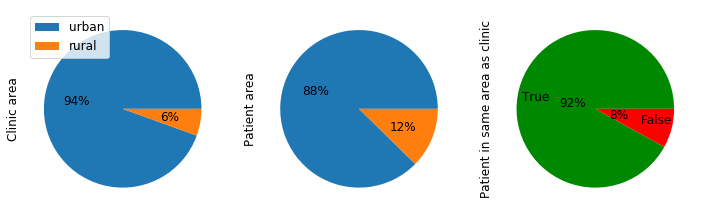

In [34]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
data.cli_area.value_counts().plot.pie(autopct='%1.0f%%', labels=None);
plt.legend(["urban", "rural"], loc="upper left")
plt.ylabel("Clinic area");

plt.subplot(1,3,2)
data.pat_area.value_counts().plot.pie(autopct='%1.0f%%', labels=None)
plt.ylabel("Patient area");

plt.subplot(1,3,3)
(data.cli_area == data.pat_area).value_counts().plot.pie(labeldistance=0.6,pctdistance=0.3, autopct='%1.0f%%', colors=["#008800", "#ff0000"])
plt.ylabel("Patient in same area as clinic");


plt.show()

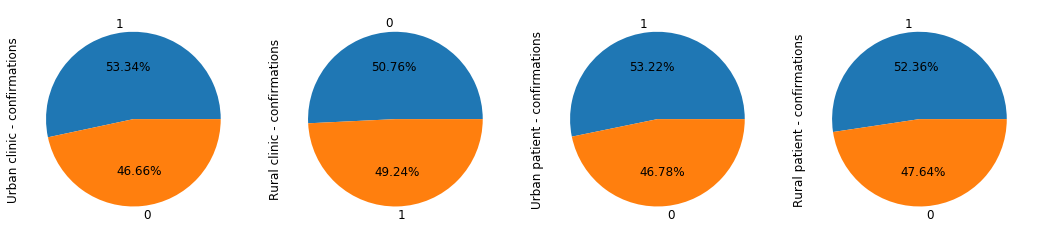

In [35]:
plt.figure(figsize=(18,8))

plt.subplot(1,4,1)
data[data.cli_area == "Urban"].response.value_counts().plot.pie(autopct='%1.2f%%')
plt.ylabel("Urban clinic - confirmations");

plt.subplot(1,4,2)
data[data.cli_area == "Rural"].response.value_counts().plot.pie(autopct='%1.2f%%')
plt.ylabel("Rural clinic - confirmations");

plt.subplot(1,4,3)
data[data.pat_area == "Urban"].response.value_counts().plot.pie(autopct='%1.2f%%')
plt.ylabel("Urban patient - confirmations");

plt.subplot(1,4,4)
data[data.pat_area == "Rural"].response.value_counts().plot.pie(autopct='%1.2f%%')
plt.ylabel("Rural patient - confirmations");


plt.show()

## Gender

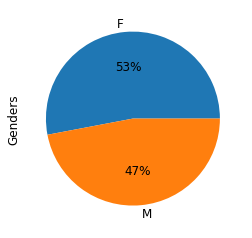

In [36]:
data.gender.value_counts().plot.pie(autopct='%1.0f%%');
plt.ylabel('Genders');

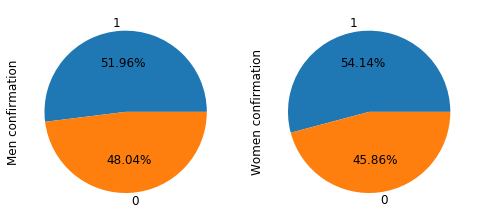

In [37]:
plt.figure(figsize=(8,6))


plt.subplot(1,2,1)
data[data.gender == "M"].response.value_counts().plot.pie(autopct='%1.2f%%')
plt.ylabel('Men confirmation')

plt.subplot(1,2,2)
data[data.gender == "F"].response.value_counts().plot.pie(autopct='%1.2f%%')
plt.ylabel('Women confirmation')

plt.show()

## Age

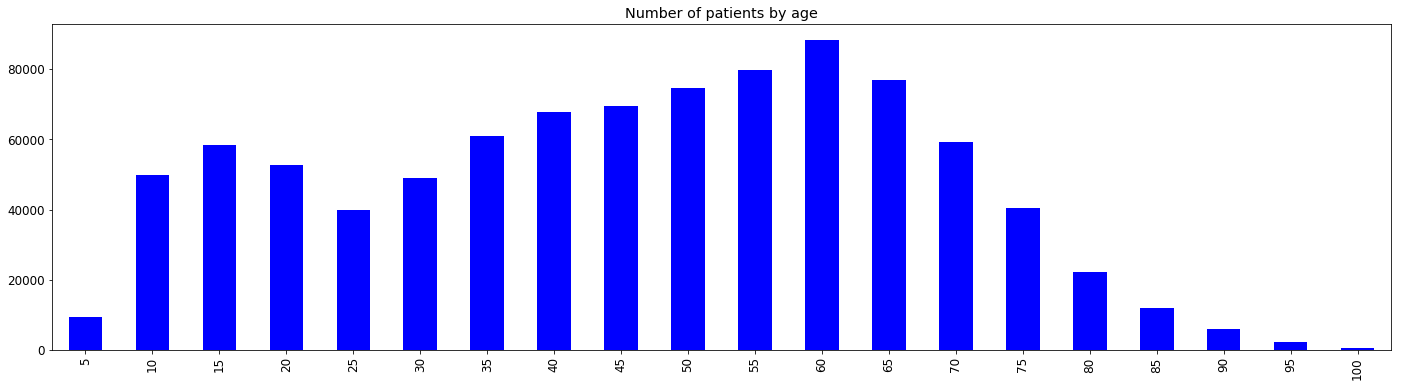

In [38]:
plt.figure(figsize=(24,6))
data.age.value_counts().sort_index().plot.bar(color="blue")
plt.title("Number of patients by age");

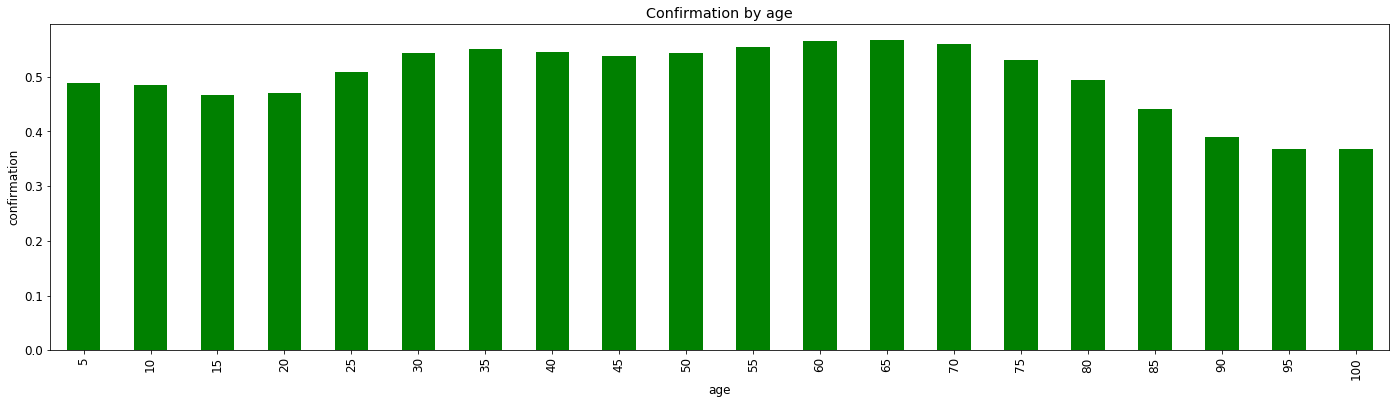

In [39]:
plt.figure(figsize=(24,6))
data.groupby("age").response.mean().plot.bar(color="green")
plt.ylabel("confirmation")
plt.title("Confirmation by age");

## Family size

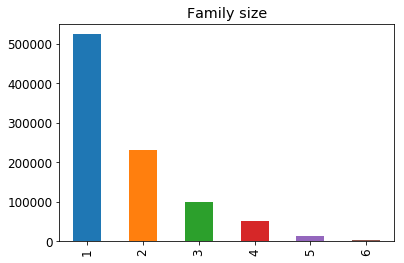

In [40]:
data.fam.value_counts().sort_index().plot.bar();
plt.title("Family size");

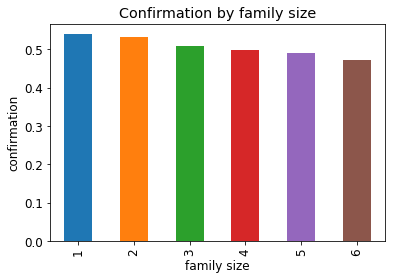

In [41]:
data.groupby("fam").response.mean().plot.bar()
plt.xlabel("family size")
plt.ylabel("confirmation")
plt.title("Confirmation by family size");

## Distance to clinic

In [42]:
print("Distances to clinic:")
data.dist.describe().round(2)

Distances to clinic:


count    919650.00
mean         10.82
std          21.27
min           0.00
25%           1.78
50%           4.19
75%          10.40
max         249.90
Name: dist, dtype: float64

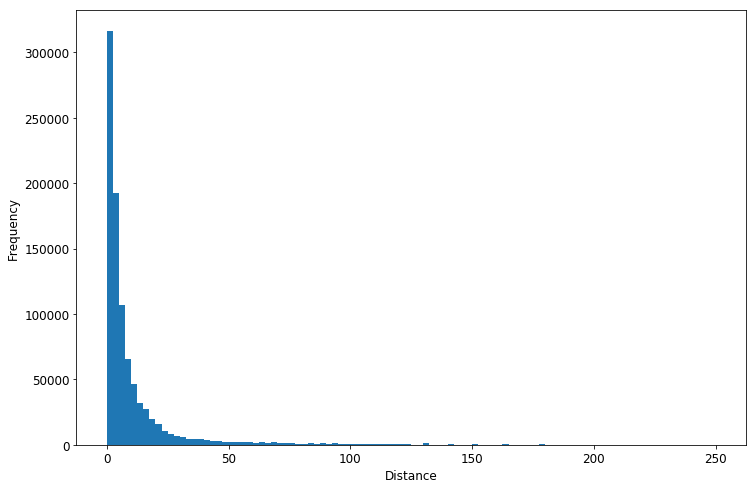

In [43]:
plt.figure(figsize=(12,8))
data.dist.plot.hist(100)
plt.xlabel("Distance");

# Correlations

Correlations:

- 00-.19 “very weak”
- 20-.39 “weak”
- 40-.59 “moderate”
- 60-.79 “strong”
- 80-1.0 “very strong”

In [44]:
# Find correlations with the target and sort
correlations = data.corr()['response'].sort_values()

# Display correlations
print("Correlation to confirmation:")
correlations

Correlation to confirmation:


clinic      -0.077856
fam         -0.027117
dist         0.009315
cli_size     0.023605
age          0.033340
family_id    0.076151
pat_id       0.079447
net_hour     0.119696
response     1.000000
Name: response, dtype: float64

In [45]:
print("Correlation to confirmation - type of reminder:")
data["response"].corr(data["type"].map({"Email": 0, "SMS": 1, "Voice": 2}))

Correlation to confirmation - type of reminder:


0.15063330221446886

In [46]:
print("Correlation to confirmation - gender:")
data["response"].corr(data["gender"].map({"F": 0, "M": 1}))

Correlation to confirmation - gender:


-0.021802642612598115

In [47]:
# jupyter nbconvert --to html --TemplateExporter.exclude_input=True analysis04_train.ipynb